# Computational Bionics: Project Exercise 1

Group members:
- Yash Waware
- Julian Lork
- Florian Frech

## Task 1: Modeling the Leg

### 1.1 Description

The following section consider the model of the leg, described by an ODE model.

A test person with a body mass of $m_b = 100$ kg is chosen.

Following state variables are involved:
- $q_1$: Extension angle of the **hip** around then transversal axis ($xy$-plane)
- $\omega_1$: Angular velocity of the tight
- $q_2$: Rotation angle of the **knee** around the transversal axis ($xy$-plane) 
- $\omega_2$ Angular velocity of the shank

The segement masses are considered as point masses in the middle of each segment.

![](LegModel.png)

|Variable|Description|
|--------|-----------|
|$r_H$|Position vector of the hip to the reference system|
|$H$|Hip Joint|
|$K$|Knee Joint|
|$O$|Tight|
|$U$|Shank|
|$S$|Centre of Mass of the Foot|
|$SO$|Centre of Mass of the Tight|
|$SU$|Centre of Mass Shank|
|$m_1$|Tight Mass|
|$m_2$|Shank Mass|
|$m_3$|Foot Point Mass|
|$J_1$|Moment of Inertia of the Tight|
|$J_2$|Moment of Inertia of the Shank|
|$\alpha_H$|Flexion / Extension Angle of the Hip|
|$\alpha_K$|Flexion / Extension Angle of the Knee|


Following relations for the partial masses of the legs are assumed:

|Segment| Mass m [kg]|
|------|--------------|
|Tight|  $m_1 = 0.090 \cdot m_b + 0.73 = 9.73$|
|Shank| $m_2 = 0.055 \cdot m_b - 0.43 = 5.07$|
|Foot| $m_3 = 0.001 \cdot m_b + 0.34 = 0.44$|

### 1.2 Simplified Box Model

**Input:**
- anatomical data
- segment weights
- proportions of the limbs
- length and position of the segments
- gait data for one cycle
    - Ground reaction **forces** in y- and x- direction
    - **Moments** around foot, knee, and hip joints
    - Flexion / Extension **angles** of the ankle, knee, and hip joint

**Equations:**

**Output:**


### 1.3 Setting
- $r_H = \begin{bmatrix} 0 & 0.915 \end{bmatrix}^T$ m
- $l_O = 0.410$ m
- $l_U = 0.415$ m

https://personal.cityu.edu.hk/meachan/Online%20Anthropometry/Chapter2/Ch2-5.htm

https://pmc.ncbi.nlm.nih.gov/articles/PMC5305206/

### 1.4 Derivation 

**Relation between common measured joint angle and the chosen generalized coordinates**

$$q_1 = \alpha_H + \frac{3}{2}\pi$$

$$q_2 = q_1 - \alpha_K = \alpha_H + \frac{3}{2}\pi - \alpha_K$$

**Position of the centre of mass for the body segments**

$$
\mathbf{R}_O = 
\begin{bmatrix}
\cos q_1 & -\sin q_1 & 0 \\
\sin q_1 &  \cos q_1 & 0 \\
0        &  0        & 1
\end{bmatrix}
$$

$$
\mathbf{R}_U = \mathbf{R}_0 \mathbf{R}_{OU} = 
\begin{bmatrix}
\cos q_2 & -\sin q_2 & 0 \\
\sin q_2 &  \cos q_2 & 0 \\
0        &  0        & 1
\end{bmatrix}
$$

Terminology:

- $\mathbf{r}_{SOH|O}$: Position vector of the centre of mass of the tigh relative to the hip joint in the hip's reference frame.

- $\mathbf{r}_{KH|O}$: Position vector of the knee relative to the hip in the hip's reference frame.

- $\mathbf{r}_{SUK|U}$: Position vector of the centre of mass of the shank relative to the knee in the knee's reference frame.

$$
\mathbf r_{SO} = \mathbf r_H + \mathbf{R}_O \mathbf r_{SOH|O} = \mathbf r_H + \mathbf{R}_O \begin{bmatrix} \frac{l_O}{2} & 0 & 0 \end{bmatrix}^T
$$

$$

\begin{align}
\mathbf{r}_{SU} &= \mathbf{r}_K + \mathbf{R}_U \mathbf{r}_{SUK|U} \\
&= \mathbf{r}_H + \mathbf{R}_O \mathbf{r}_{KH|O} + \mathbf{R}_U \mathbf{r}_{SUK|U} \\
&= \mathbf{r}_H + \mathbf{R}_O \begin{bmatrix} l_O & 0 & 0 \end{bmatrix}^T 
   + \mathbf{R}_U \begin{bmatrix} \frac{l_U}{2} & 0 & 0 \end{bmatrix}^T
\end{align}

$$

**Kinetic Energy $T$**

$$\mathbf{v}_{Si} = \dot{ \mathbf{r}}_{Si} \quad <\quad \mathbf{\omega_i} = \begin{bmatrix} 0 & 0 & \dot{q}_i \end{bmatrix}^T$$

$$
T = \sum_{i=1}^k = \frac{1}{2} m_i \mathbf{v}_{Si}^T + \frac{1}{2} J_i \mathbf{\omega_i}^T \mathbf{\omega_i}
$$

Assumptions:

$$
\dot{\mathbf{r}}_{SOH|O} = \dot{\mathbf{r}}_{KH|O} = \dot{\mathbf{r}}_{SUK|U} = \dot{\mathbf{r}}_{SK|U}
$$

$$
\begin{align}
\mathbf{v}_{S1}
& = \dot{\mathbf{r}}_{SO} \\
& = \dot{\mathbf r}_H + \dot{\mathbf{R}}_O \mathbf r_{SOH|O} \\
& = \dot{\mathbf r}_H + \dot{\mathbf{R}}_O \begin{bmatrix} \frac{l_O}{2} & 0 & 0 \end{bmatrix}^T
\end{align}
$$

$$
\begin{align}
\mathbf{v}_{S2}
& = \dot{\mathbf{r}}_{SU} \\
& = \dot{\mathbf r}_H + \dot{\mathbf{R}}_O \mathbf r_{KH|O} + \dot{\mathbf{R}}_U \mathbf r_{SUK|U}\\
& = \dot{\mathbf r}_H + \dot{\mathbf{R}}_O \begin{bmatrix} \frac{l_O}{2} & 0 & 0 \end{bmatrix}^T
+ \dot{\mathbf{R}}_U \begin{bmatrix} \frac{l_U}{2} & 0 & 0 \end{bmatrix}^T
\end{align}
$$

$$
T_1 = \frac{m_O}{2} \mathbf{v}_{S1}^T \mathbf{v}_{S1} + \frac{J_O}{2} \omega_1^2 = \frac{m_O}{2} \left( \dot{\mathbf{r}}_H + \dot{\mathbf{R}}_O \mathbf{r}_{SOH|O} \right)^T \left( \dot{\mathbf{r}}_H + \dot{\mathbf{R}}_O \mathbf{r}_{SOH|O} \right) + \frac{J_O}{2} \dot{q}_1^2
$$

$$
T_2 = \frac{m_U}{2} \mathbf{v}_{S2}^T \mathbf{v}_{S2} + \frac{J_U}{2} \omega_2^2 = \frac{m_U}{2} \left( \dot{\mathbf{r}}_H + \dot{\mathbf{R}}_O \mathbf{r}_{KH|O} + \dot{\mathbf{R}}_U \mathbf{r}_{SUK|U} \right)^T \left( \dot{\mathbf{r}}_H + \dot{\mathbf{R}}_O \mathbf{r}_{KH|O} + \dot{\mathbf{R}}_U \mathbf{r}_{SUK|U} \right) + \frac{J_U}{2} \dot{q}_2^2
$$

$$
T_2 = \frac{m_U}{2} \mathbf{v}_{S2}^T \mathbf{v}_{S2} + \frac{J_S}{2} \omega_2^2 = \frac{m_U}{2} \left( \dot{\mathbf{r}}_H + \dot{\mathbf{R}}_O \mathbf{r}_{KH|O} + \dot{\mathbf{R}}_U \mathbf{r}_{SK|U} \right)^T \left( \dot{\mathbf{r}}_H + \dot{\mathbf{R}}_O \mathbf{r}_{KH|O} + \dot{\mathbf{R}}_U \mathbf{r}_{SU|U} \right) + \frac{J_S}{2} \dot{q}_2^2
$$

**Potential Energy $V$**

$$
V_1 = -m_O \mathbf{g}^T \mathbf{r}_{SO} = -m_O \mathbf{g}^T \left(\mathbf{r}_H + \mathbf{R}_{O}\mathbf{r}_{SOH|O} \right)
$$

$$
    V_2 = -m_U \mathbf{g}^T \mathbf{r}_{SU} = -m_U \mathbf{g}^T \left(\mathbf{r}_H + \mathbf{R}_O \mathbf{r}_{KH|O} + \mathbf{R}_U \mathbf{r}_{SUK|U} \right)
$$

$$
V_3 = -m_F \mathbf{g}^T \mathbf{r}_S = -m_F \mathbf{g}^T \left( \mathbf{r}_H + \mathbf{R}_O \mathbf{r}_{KH|O} + \mathbf{R}_U \mathbf{r}_{SK|U} \right)
$$

We obtain the **Lagrange Function:**

$$
\mathbf{L} = \mathbf{T}_1 + \mathbf{T}_2  - \mathbf{V}
$$

$$
\frac{\partial}{\partial t} \left(\frac{\partial L}{\partial \dot{q}_i} - \frac{\partial L}{\partial q_i} \right) = Q_i
$$

 - $L$: Lagrange Function
 - $Q$: Generalized Forces
 - $T$: Kinetic Energy

In [69]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [ ]:
# Constants
bodyweight = 100  # kg
m_thigh = 0.09 * bodyweight + 0.73
m_shank = 0.055 * bodyweight - 0.43
m_foot = 0.001 * bodyweight + 0.34

L_thigh = 0.415  # meters
L_shank = 0.410  # meters

g = 9.81  # gravity

In [89]:
# Moments of inertia
I_thigh = (1/3) * m_thigh * L_thigh**2
I_shank = (1/3) * m_shank * L_shank**2 + (m_foot * L_shank**2) # foot is considered as a point mass

In [97]:
# Parse xls file
filename = 'gait_data.xls'
data = pd.read_excel(filename)

gait = data['gait_%'] / 100

GRFx_BW = data['GRFx[%BW]']
GRFz_BW = data['GRFz[%BW]']

alpha_H_deg = data['Flex_Ext_H[deg]']
q1_rad = np.deg2rad(alpha_H_deg) + 3/2 * np.pi 

alpha_K_deg = data['Flex_Ext_K[deg]']
q2_rad = q1_rad - np.deg2rad(alpha_K_deg) 

moments_H = data['MX_H[Nm/kg]'] * bodyweight
moments_K = data['MX_K[Nm/kg]'] * bodyweight
moments_F = data['MX_F[Nm/kg]'] * bodyweight

In [98]:
# Interpolation of input data
time = np.linspace(0, 1, len(data))
M_hip = np.interp(time, np.linspace(0, 1, len(data)), moments_H)
M_knee = np.interp(time, np.linspace(0, 1, len(data)), moments_K)
q1_init = q1_rad[0]
q2_init = q2_rad[0]

In [99]:
def interpolate_data(data, gait_time, t):
    """Interpolates gait data for a given time."""
    return np.interp(t, gait_time, data)

In [100]:
# ODE system
def leg_dynamics(t, y):
    q1, w1, q2, w2 = y

    # Interpolated joint moments
    M_hip = interpolate_data(moments_H, gait, t)
    M_knee = interpolate_data(moments_K, gait, t)
    
    # Torques
    T1 = -m_thigh * g * L_thigh / 2 * np.sin(q1) + M_hip
    T2 = -m_shank * g * L_shank / 2 * np.sin(q2) + M_knee
    
    # Equations of motion
    dq1dt = w1
    dw1dt = T1 / I_thigh
    dq2dt = w2
    dw2dt = T2 / I_shank
    
    return [dq1dt, dw1dt, dq2dt, dw2dt]

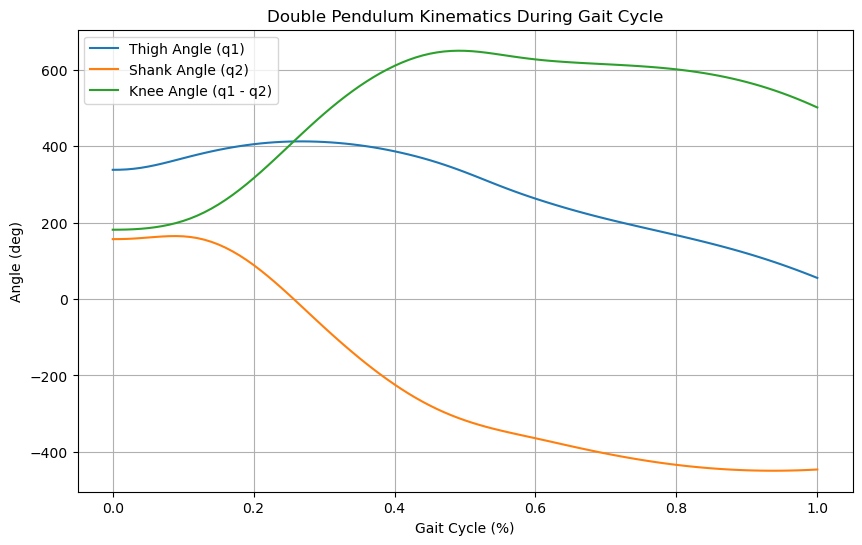

In [101]:
# Time step
dt = 0.01
t_start = 0
t_end = 1
t_eval = np.arange(t_start, t_end, dt)

# Initial conditions
y0 = [q1_init, 0, q2_init, 0]

# Time span
t_span = (0, 1)
t_eval = np.linspace(0, 1, 101)

# Solve ODE
sol = solve_ivp(leg_dynamics, (t_start, t_end), y0, t_eval=t_eval, method='RK45')

# Results
q1, w1, q2, w2 = sol.y

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(t_eval, np.degrees(q1), label="Thigh Angle (q1)")
plt.plot(t_eval, np.degrees(q2), label="Shank Angle (q2)")
plt.plot(t_eval, np.degrees(q1 - q2), label="Knee Angle (q1 - q2)")
plt.xlabel("Gait Cycle (%)")
plt.ylabel("Angle (deg)")
plt.title("Double Pendulum Kinematics During Gait Cycle")
plt.legend()
plt.grid()
plt.show()
